## 1) Read the description of the problem and identify your input and output variables. Load the data using pandas and split the data frame into X (inputs) and y (outputs). (2 points)

In [62]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()
from matplotlib import pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 34

In [63]:
cancer_db = pd.read_csv("risk_factors_cervical_cancer.csv")
cancer_db.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [64]:
cancer_db = cancer_db.replace('?', float('nan'))
cancer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

The last four columns are indicators (or screening methods) used to examine whether the patient has cancer or not [1]. As a first step, let's store all four indicators into y dataframe.

In [65]:
from sklearn.model_selection import train_test_split

x = cancer_db.drop(labels=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
y = cancer_db[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = None, random_state = 42)

## 2) Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. (7 points)

In [66]:
X_train = X_train.apply(pd.to_numeric)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 526 to 102
Data columns (total 32 columns):
Age                                   514 non-null int64
Number of sexual partners             498 non-null float64
First sexual intercourse              510 non-null float64
Num of pregnancies                    481 non-null float64
Smokes                                505 non-null float64
Smokes (years)                        505 non-null float64
Smokes (packs/year)                   505 non-null float64
Hormonal Contraceptives               450 non-null float64
Hormonal Contraceptives (years)       450 non-null float64
IUD                                   442 non-null float64
IUD (years)                           442 non-null float64
STDs                                  449 non-null float64
STDs (number)                         449 non-null float64
STDs:condylomatosis                   449 non-null float64
STDs:cervical condylomatosis          449 non-null float64
STDs:vagin

Initially, the X_train dataset needs to be analyzed to reduce the number of input features and handle missing values. In the given dataset it is more resonable to impute missing values as the size of dataframe is quite small. In the best scenario the 12% of the initial size might be lost. But as missing values usually staying not in line (otherwise it would question the idea to put this patient info in the table), this number might be bigger. Imputed values are considered to be the most frequent value in a column in order not to disturb the general picture.

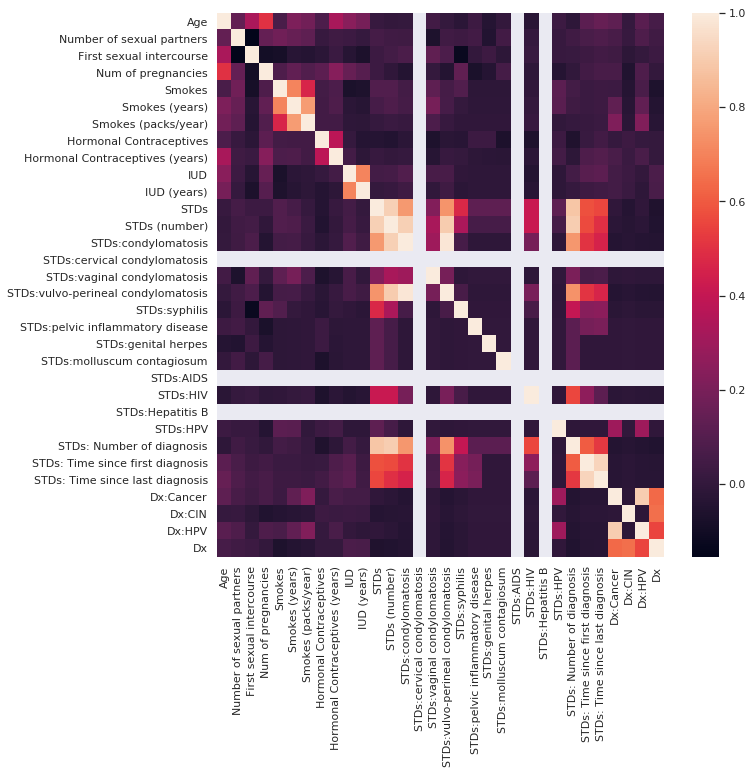

In [67]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.apply(lambda x: x.fillna(x.mode()[0], axis=0)).corr())

As it is shown the percentage of NaN values varies from 12% to 91%. Values with 91% NaN values are definately out of consideration, so need to be removed from dataset ('STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis'). Part with STDs diseases need to be considered separately because generally consists of two main subsets, the first one is 'STDs: Number of diagnosis' and the second is set of all features starting with STDs. In the heatmap above it is clear that visually all STDs features highly correlates with the 'STDs: Number of diagnosis'. One may notice that the feature 'STDs' has better correlation, but avtually the feature 'STDs: Number of diagnosis' represents better the history of having STDs as was presented for every patient compared to others. Therefore, all features with STDs need to removed except for 'STDs: Number of diagnosis'.

In [68]:
X_train = X_train.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',\
                        'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',\
                        'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',\
                        'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
                        'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',\
                        'STDs:HPV'], axis=1)

X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,514.000000,498.000000,510.000000,481.000000,505.000000,505.000000,505.000000,450.000000,450.000000,442.000000,442.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,26.764591,2.500000,16.956863,2.284823,0.122772,1.011083,0.359484,0.651111,2.203072,0.101810,0.457919,0.099222,0.021401,0.011673,0.021401,0.027237
std,8.064617,1.432941,2.751335,1.437576,0.328501,3.836354,2.059451,0.477149,3.504789,0.302741,1.942348,0.330218,0.144857,0.107515,0.144857,0.162933
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,15.000000,29.000000,8.000000,1.000000,37.000000,37.000000,1.000000,20.000000,1.000000,19.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X_train = X_train.apply(lambda x: x.fillna(x.mode()[0], axis=0))
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,26.764591,2.484436,16.957198,2.202335,0.120623,0.993379,0.353190,0.694553,1.928759,0.087549,0.393774,0.099222,0.021401,0.011673,0.021401,0.027237
std,8.064617,1.413094,2.740590,1.425852,0.326005,3.804869,2.041851,0.461045,3.358751,0.282913,1.807904,0.330218,0.144857,0.107515,0.144857,0.162933
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,15.000000,29.000000,8.000000,1.000000,37.000000,37.000000,1.000000,20.000000,1.000000,19.000000,3.000000,1.000000,1.000000,1.000000,1.000000


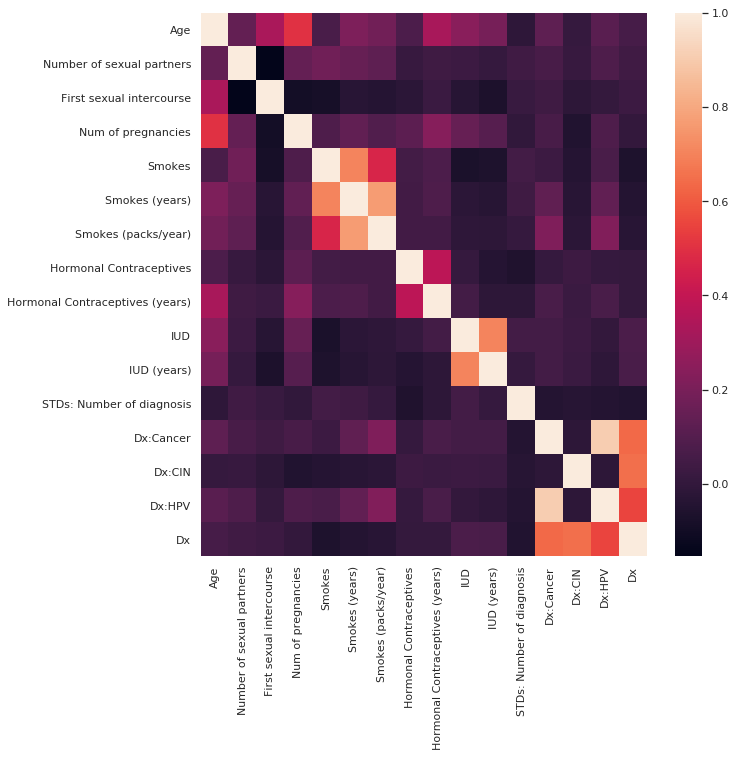

In [70]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr())

'Dx:Cancer', 'Dx:CIN', 'Dx:HPV' and 'Dx' are also highly correlated features, so let's keep only 'Dx' as it correlates the best with three others.

In [71]:
X_train_m = X_train.drop(['Dx:Cancer', 'Dx:CIN', 'Dx:HPV'], axis=1)

As the final task is to predict cervical cancer we need to consider carefully the indicators given. Due to lack of information about indicators in data and related paper [2], we may assume that having '1' in one of four indicator results in having a cancer. Also, having '0' in other indicators may mean either negative result or not passing this examination. So, let's create new variable that will be calculated in following way:
can_res = maxincolumns('Hinselmann', 'Schiller', 'Citology', 'Biopsy')

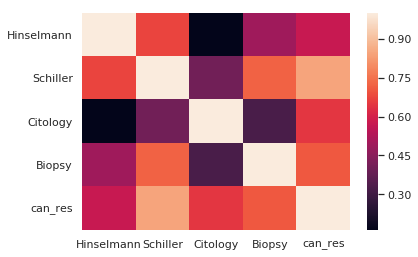

In [72]:
y_train['can_res'] = y_train.loc[:, ('Biopsy', 'Hinselmann', 'Schiller', 'Citology')].max(axis=1).copy()

sns.heatmap(y_train.corr())

New target value highly correlates with all indicators so preserve only this value.

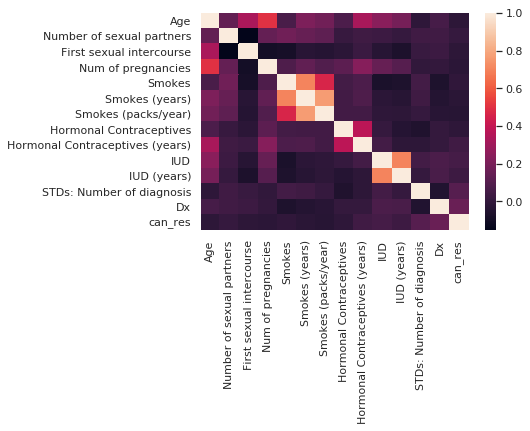

In [73]:
y_train_new = y_train.drop(['Biopsy', 'Hinselmann', 'Schiller', 'Citology'], axis=1)

db_train = pd.concat([X_train_m, y_train_new], axis=1, sort=False).reset_index(drop=True)
sns.heatmap(db_train.corr())

## 3) Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice. (7 points)

In [74]:
db_train_cancer = db_train.loc[db_train['can_res'] == 1]
db_train_no_cancer = db_train.loc[db_train['can_res'] == 0]

db_train_cancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs: Number of diagnosis,Dx,can_res
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,26.370968,2.532258,16.838710,2.129032,0.112903,0.713983,0.160697,0.677419,2.303548,0.129032,0.546935,0.193548,0.096774,1.0
std,7.642062,1.224313,2.516787,1.299229,0.319058,2.329425,0.574240,0.471280,4.153956,0.337972,2.493538,0.506958,0.298064,0.0
min,15.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,25.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.460000,0.000000,0.000000,0.000000,0.000000,1.0
75%,30.750000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,48.000000,6.000000,29.000000,6.000000,1.000000,10.000000,3.500000,1.000000,19.000000,1.000000,19.000000,3.000000,1.000000,1.0


In [75]:
db_train_no_cancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs: Number of diagnosis,Dx,can_res
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0
mean,26.818584,2.477876,16.973451,2.212389,0.121681,1.031703,0.379593,0.696903,1.877350,0.081858,0.372765,0.086283,0.017699,0.0
std,8.127466,1.438140,2.772082,1.443397,0.327280,3.964984,2.166081,0.460106,3.236701,0.274453,1.695052,0.296450,0.132002,0.0
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0
75%,31.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,79.000000,15.000000,29.000000,8.000000,1.000000,37.000000,37.000000,1.000000,20.000000,1.000000,17.000000,2.000000,1.000000,0.0


From the two table right above there should be deducted several noticeable points:
1. There is significant difference (from 20% to 40%) in smoking behaviour in case having cancer and not. On average, patients with cancer are less smokers than those who are cancer-negative. It is wrong from biological standpoint as currently smoking is considered to be a cofactor of CC developing [3]. It might have happened just due to relatively small size of dataset. (delete those features due to irrelevance)
2. The percentage of those who ever tried to use hormonal contraceptives is nearly the same for both groups, but period of using it differs drastically (up to 46%) so the longer woman used hormonal contraceptive the higher risk of cancer was.
3. Taking a look at 'IUD' column it is getting obvious that women who used IUD are more prone to develop cervical cancer (difference in this indicator is up to 33%)
4. Also number of STDs diagnosis heavily affects the risk of cancer developing (on average women with cancer had double more STDs diagnosed)
5. Finally, having in past any of Dx (HVP, Cancer or Neoplasia) doubles the risk of having cancer in future.
6. Any other factors like age, number of sexual partners, time of first sexual intercourse and num of pregnancies are pretty much the same for both groups so do not contribute to cancer developing. (those features need removing)

In [76]:
X_train_m = X_train_m.drop(['Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Age', 
                            'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies'], axis=1,
                            errors='ignore')
db_train = pd.concat([X_train_m, y_train_new], axis=1, sort=False).reset_index(drop=True)
db_train.sort_values(by='can_res', ascending=False).head(40)

,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs: Number of diagnosis,Dx,can_res
275,1.0,0.25,0.0,0.00,1,0,1
487,1.0,2.00,1.0,0.91,0,0,1
231,1.0,10.00,1.0,1.00,0,0,1
232,1.0,5.00,0.0,0.00,0,0,1
308,1.0,1.00,0.0,0.00,0,0,1
127,1.0,0.25,0.0,0.00,0,0,1
470,0.0,0.00,0.0,0.00,0,0,1
304,1.0,2.00,0.0,0.00,1,0,1
238,0.0,0.00,0.0,0.00,0,0,1
239,1.0,10.00,1.0,2.00,0,0,1


Besides the way for feature selection proposed we may try to use RandomForestClassifier with initial set of features (except for STDs) to compare two methods. 

Feature ranking:
1. Age (0.222455)
2. First sexual intercourse (0.176259)
3. Hormonal Contraceptives (years) (0.144814)
4. Number of sexual partners (0.123231)
5. Num of pregnancies (0.097891)
6. STDs: Number of diagnosis (0.040231)
7. IUD (years) (0.040222)
8. Hormonal Contraceptives (0.030526)
9. Smokes (packs/year) (0.030277)
10. Smokes (years) (0.025026)
11. Dx (0.017175)
12. IUD (0.012347)
13. Dx:Cancer (0.011943)
14. Dx:HPV (0.011621)
15. Smokes (0.009809)
16. Dx:CIN (0.006173)


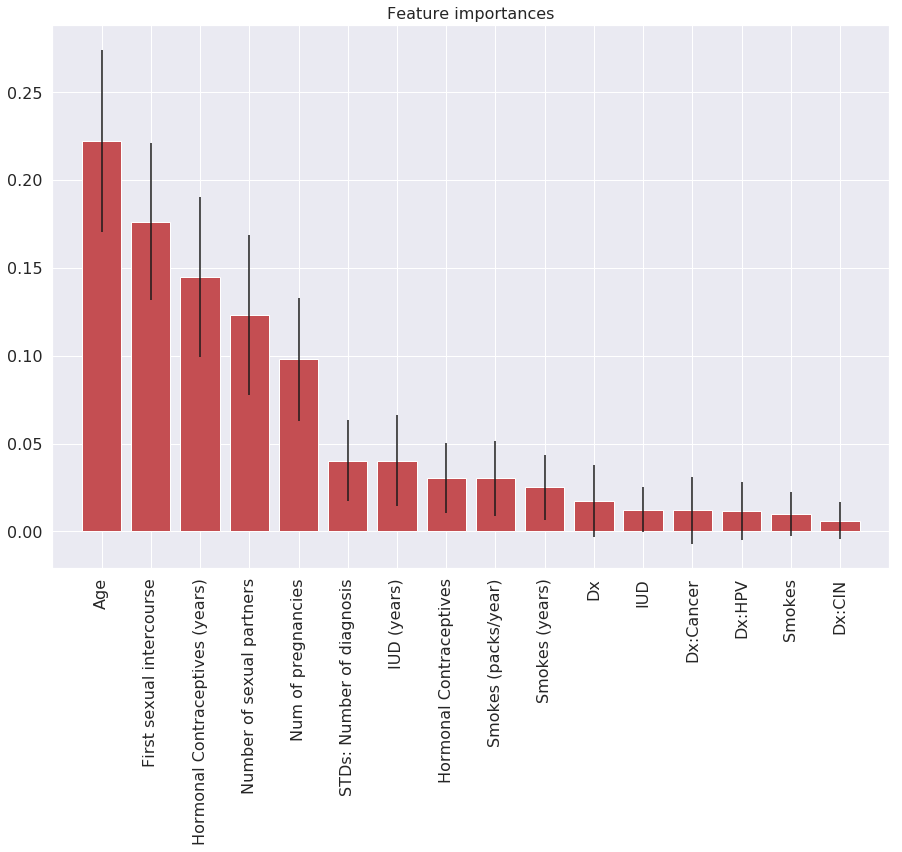

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250, random_state=0)
forest.fit(X_train, y_train_new)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, (X_train.columns[indices[f]]), importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,10))
plt.title("Feature importances", size=16)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[indices[f]] for f in range(X_train.shape[1])], 
           rotation='vertical', size=16)
plt.yticks(size=16)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### It turned out that the set of features we obtained is completely different compared to the first one. It can be easily explained as we cannot trust and make some assumptons of differencies between values if their std are quite high (relative accuracy is extremely low). So for future steps we will be using first 5 features selected by RandomClassifier: Age, First sexual intercourse, Hormonal Contraceptives, Number of sexual partners, Num of pregnancies.

In [78]:
X_train = X_train.loc[:, ['Age', 'First sexual intercourse', 'Hormonal Contraceptives (years)',
                          'Number of sexual partners', 'Num of pregnancies']]
db_train = pd.concat([X_train, y_train_new], axis=1, sort=False).reset_index(drop=True)
db_train.sort_values(by=['can_res'], ascending=False).head()

,Age,First sexual intercourse,Hormonal Contraceptives (years),Number of sexual partners,Num of pregnancies,can_res
275,20,19.0,0.25,1.0,1.0,1
487,29,14.0,2.00,3.0,2.0,1
231,48,16.0,10.00,4.0,4.0,1
232,26,19.0,5.00,3.0,2.0,1
308,18,15.0,1.00,2.0,3.0,1


Text(0.5, 1.0, 'Age distribution for women with and without cancer')

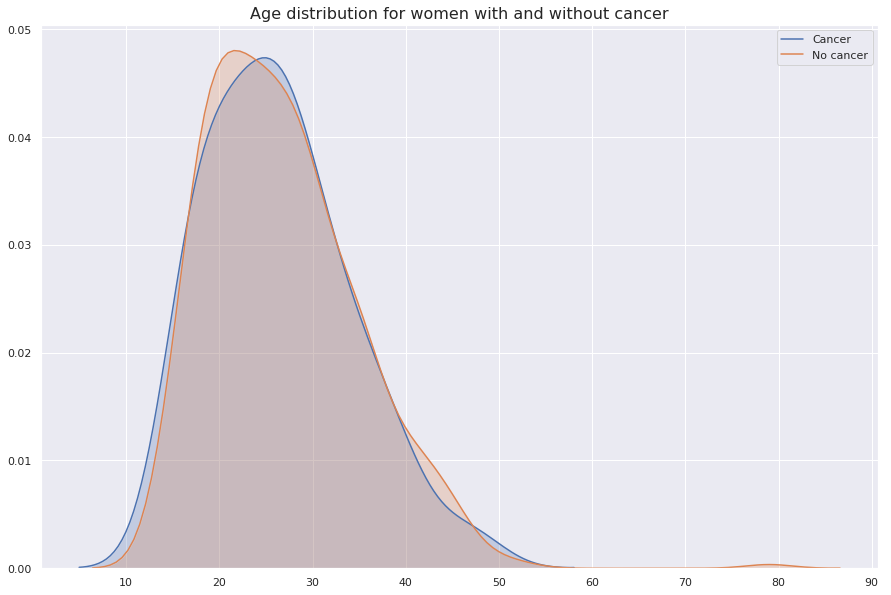

In [79]:
plt.figure(figsize=(15,10))
sns.kdeplot(db_train['Age'].loc[db_train['can_res'] == 1], label="Cancer", shade=True)
sns.kdeplot(db_train['Age'].loc[db_train['can_res'] == 0], label="No cancer", shade=True)
plt.legend()
plt.title("Age distribution for women with and without cancer", size=16)

Text(0.5, 1.0, 'First sexual intercourse distribution for women with and without cancer')

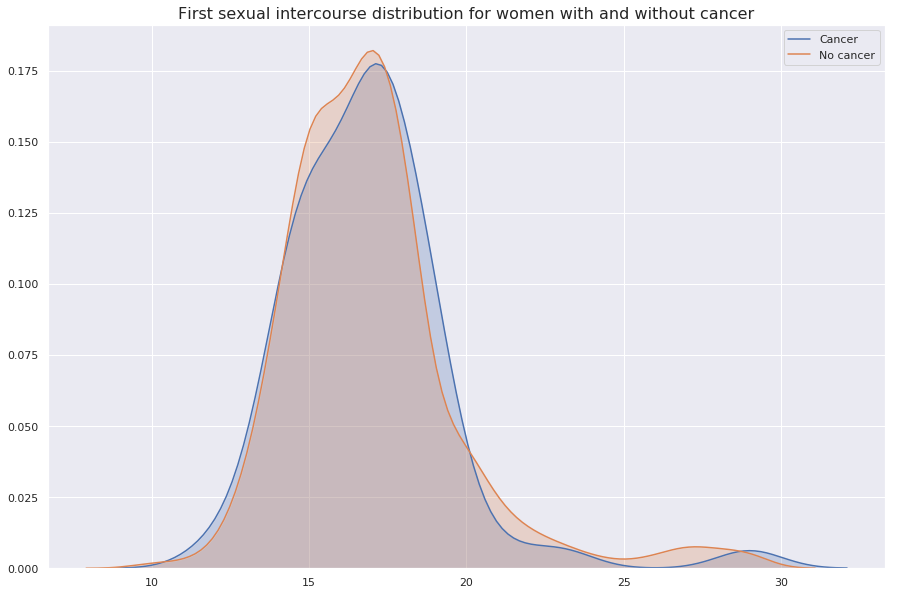

In [80]:
plt.figure(figsize=(15,10))
sns.kdeplot(db_train['First sexual intercourse'].loc[db_train['can_res'] == 1], label="Cancer", shade=True)
sns.kdeplot(db_train['First sexual intercourse'].loc[db_train['can_res'] == 0], label="No cancer", shade=True)
plt.legend()
plt.title("First sexual intercourse distribution for women with and without cancer", size=16)

Text(0.5, 1.0, 'Hormonal contraceptives distribution for women with and without cancer')

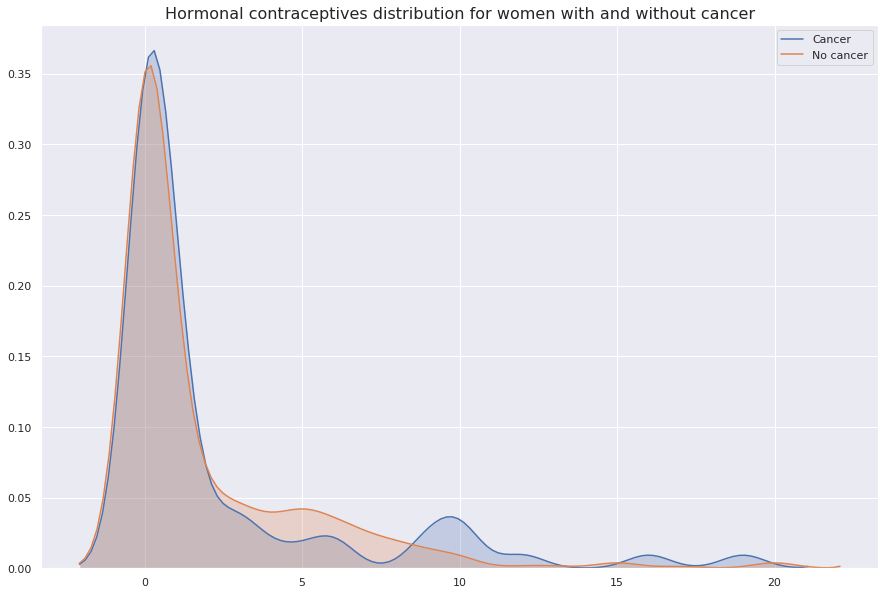

In [81]:
plt.figure(figsize=(15,10))
sns.kdeplot(db_train['Hormonal Contraceptives (years)'].loc[db_train['can_res'] == 1], label="Cancer", shade=True)
sns.kdeplot(db_train['Hormonal Contraceptives (years)'].loc[db_train['can_res'] == 0], label="No cancer", shade=True)
plt.legend()
plt.title("Hormonal contraceptives distribution for women with and without cancer", size=16)

Text(0.5, 1.0, 'Number of sexual partners distribution for women with and without cancer')

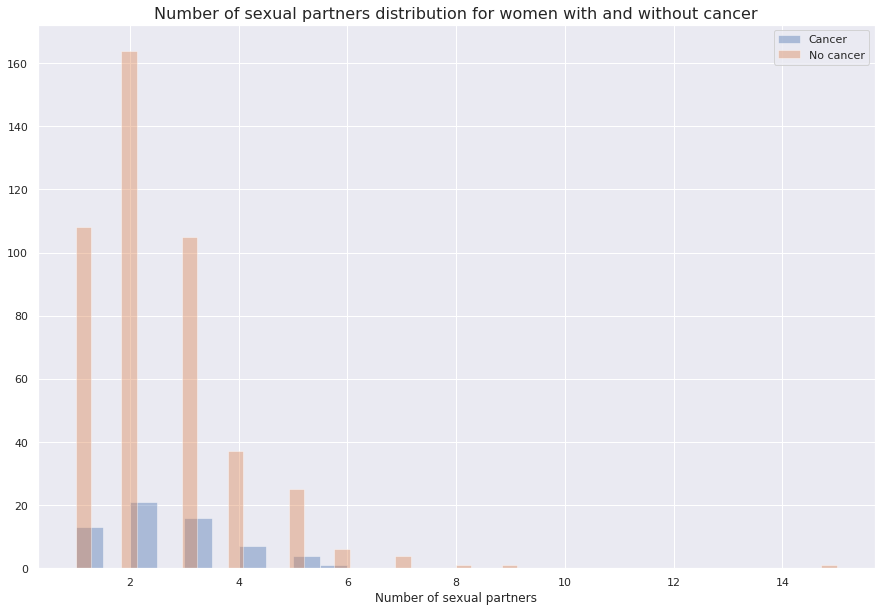

In [82]:
plt.figure(figsize=(15,10))
sns.distplot(db_train['Number of sexual partners'].loc[db_train['can_res'] == 1], label="Cancer", kde=False)
sns.distplot(db_train['Number of sexual partners'].loc[db_train['can_res'] == 0], label="No cancer", kde=False)
plt.legend()
plt.title("Number of sexual partners distribution for women with and without cancer", size=16)

In general, there is no visual difference between two groups therefore no simple rule to distinguish two classes.

## 4) Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. (9 points)

In [83]:
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.apply(lambda x: x.fillna(x.mode()[0], axis=0))
X_test = X_test.loc[:, ('Age', 'First sexual intercourse',
                        'Hormonal Contraceptives (years)', 'Number of sexual partners',
                        'Num of pregnancies')]
y_test['can_res'] = y_test.loc[:, ('Biopsy', 'Hinselmann', 'Schiller', 'Citology')].max(axis=1).copy()
y_test_new = y_test.drop(['Biopsy', 'Hinselmann', 'Schiller', 'Citology'], axis=1)
db_test = pd.concat([X_test, y_test_new], axis=1, sort=False).reset_index(drop=True)

In [84]:
X_train = X_train.reset_index(drop=True)
y_train_new = y_train_new.reset_index(drop=True)

Prepare parameter grid for GridSearchCV with RandomForestClassifier and KNeighborsClassifier.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

n_neighbors = [int(x) for x in np.linspace(start = 3, stop = 30)]

clf_rf = {
        'clf': [RandomForestClassifier(random_state=7, n_jobs=-1)],
        'clf__n_estimators': n_estimators,
        'clf__max_depth': max_depth
}
clf_knc = {
        'clf' : [KNeighborsClassifier()],
        'clf__n_neighbors' : n_neighbors
}

grid_param = [clf_rf, clf_knc]

As we deal with imbalanced dataset in the given case we will SMOTE use over-sampling technique to improve precision and recall scores [4] on test data and to correct for a bias in the original dataset.

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


kfold = StratifiedKFold(n_splits=5, random_state=7, shuffle=True) # 5-fold CV

pipe = imbPipeline([('sec', StandardScaler()),
                    ('smote', SMOTE(kind="regular", random_state=7)),
                    ('clf', RandomForestClassifier(random_state=7, n_jobs=-1))])
recall_scorer = make_scorer(recall_score, average='macro')

clf_tuned = GridSearchCV(pipe, param_grid = grid_param,
                         cv = kfold, verbose=2, n_jobs = -1, scoring=recall_scorer)
clf_tuned.fit(X_train, y_train_new)
print(clf_tuned.best_params_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.3s


{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform'), 'clf__n_neighbors': 8}


[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   38.8s finished


After cross-validation, KNeighborsClassifier scored the highest result with the following parameters:
1. n_neighbors=8

Let's look at the results of tuned estimator

In [87]:
print(classification_report(y_train_new, clf_tuned.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       452
           1       0.34      0.89      0.50        62

   micro avg       0.78      0.78      0.78       514
   macro avg       0.66      0.83      0.68       514
weighted avg       0.90      0.78      0.82       514



In [88]:
print(classification_report(y_test_new, clf_tuned.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       304
           1       0.12      0.40      0.19        40

   micro avg       0.60      0.60      0.60       344
   macro avg       0.51      0.51      0.46       344
weighted avg       0.80      0.60      0.67       344



In the given dataset estimating of accuracy is considered to be wrong as classes are quite imbalanced. Precision and recall scores are much better as the first represents the ratio of TP/(TP + FP) and the latter TP/(TP + FN).
Having TP in numerator is important as it takes into account hits to the smaller class in the dataset.

## 5) Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. (5 points)

As a result of work done, we ended up with the numbers above. First of all it is worth mentioning that dataset was highly imbalanced, there were a lot of features and less then a thousand samples. Using Logistic Regression in this case was devoid of sense, as visually points in different classes didn't seem to be separable. In addition, imbalance of two classes made meaningless using any of standard approaches with RF or KNeighorClassifier even with good cross-validation technique. In such cases the simplest and quite effective option is a using of oversampling method to get rid of bias therefore make classes balanced. Specifically in the work SMOTE technique was used to balance data. <br>
The applicability of this model in real life scenario is doubtfull as it is not representative. First of all, one may notice that there were up 13% samples with missing values. It is not on itself, it is problem in combination with a fact that the size of dataset is relatively small. <br>
From biological standpoint the contribution of most-important features are more-less make sense, as it is widely known that the time of first sexual intercourse, the period of using hormonal Contraceptives, the number of sexual partners are in strong dependancy with the risk of cancer developing. Moreover, there are other more important factors, which weren't detected and weren't ranked high such as: smoking, having STDs etc, so we may notice not a strong compliance with a biological facts. <br>
Anyway, keeping all there technicalities and discrepancies in mind, we got relatively satisfactory results even for test samples: **precision value** is 0.12 and **recall value** is 0.4. 

## References:
1. https://en.wikipedia.org/wiki/Cervical_screening
2. http://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29 
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3140050/
4. https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis